# 🏡 Barcelona Airbnbs Data Analysis

## 📌 Introduction
This notebook explores Airbnb listings data to analyze **pricing, availability, and trends** in different neighborhoods.  
We will clean the dataset, perform **exploratory data analysis (EDA)**, and generate **key insights**.

### 🎯 **Objective**
- Understand **price distribution** and factors affecting pricing.
- Explore **room types** and their availability.
- Identify **popular neighborhoods** for Airbnb stays.
- Analyze **reviews and customer engagement trends**.

### 📂 **Dataset Overview**
- The dataset contains Airbnb listings with details like **price, room type, neighborhood, availability, and reviews**.
- We will **clean the data**, handle missing values, and remove duplicates before analysis.

---


In [14]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to the actual file name)
df = pd.read_csv("listings.csv")

# Display the first few rows
df.head
# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()




np.int64(4)

### 🔍 **Insight**
- The dataset has **various details** about Airbnb listings, including **host information, location, price, and availability**.
- Some columns like **price, last_review, and reviews_per_month** may have **missing values** that need cleaning.


## 🛠 **Data Cleaning**
Before analysis, we must:
1. **Handle missing values** in `price`, `reviews_per_month`, and `last_review`.
2. **Remove duplicate listings** to avoid skewed results.
3. **Ensure correct data types** for numerical analysis.


In [15]:


# Fill missing values for host_name with "Unknown"
df.loc[:, 'host_name'] = df['host_name'].fillna("Unknown")

# Replace missing prices with the median price
df.loc[:, 'price'] = df['price'].fillna(df['price'].median())

# Fill missing last_review values with "No Reviews"
df.loc[:, 'last_review'] = df['last_review'].fillna("No Reviews")

# Replace missing reviews_per_month values with 0
df.loc[:, 'reviews_per_month'] = df['reviews_per_month'].fillna(0)


# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates()
#remove the license column
df.drop(columns=['license'], inplace=True)

# Reset index after removing duplicates
df = df.reset_index(drop=True)





In [16]:
# Display summary of missing values after cleaning
print(df.isnull().sum())

# Save the cleaned dataset
df.to_csv("cleaned_listings.csv", index=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


### 🔍 **Insight**
- **Host Name**: Missing names were replaced with `"Unknown"`.
- **Price**: Filled missing values with the **median price** to maintain realistic pricing.
- **Last Review**: Replaced with `"No Reviews"` to indicate listings without reviews.
- **Reviews per Month**: Set to **0** for listings with no reviews.
- **Duplicates**: Removed to ensure **data integrity**.


# 📊 Exploratory Data Analysis (EDA)

Now that the data is cleaned, let's analyze key aspects such as:
- **Price distribution**: Understanding pricing trends.
- **Room types**: Identifying popular accommodation types.
- **Neighborhood trends**: Checking availability in different areas.
- **Review patterns**: Examining guest engagement and feedback.


## 💰 Price Distribution
Understanding how prices vary across listings can help detect **pricing trends** and **outliers**.


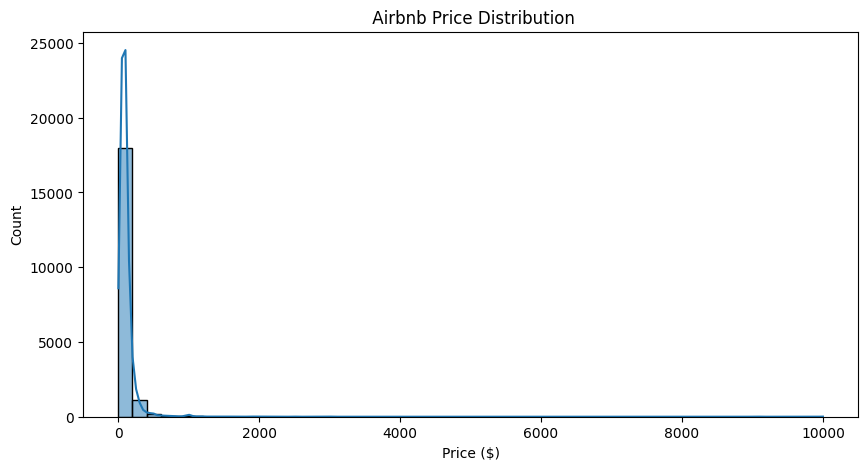

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📉 Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)

plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title(" Airbnb Price Distribution")
plt.show()


### Insights from the Price Distribution

#### Most Airbnb listings are affordable  
- The highest concentration of listings is **below $200** per night, indicating that budget-friendly accommodations dominate the market.  

#### The distribution is right-skewed  
- A long tail extends towards higher prices, meaning a small number of listings are significantly more expensive.  

#### Potential outliers exist  
- Some listings have prices well above the majority, which might distort summary statistics like the **mean price**.  


## Handling Price Outliers
We apply a threshold to remove extreme price values that are unrealistic (e.g., luxury listings or incorrect data entries).

- We define outliers as values beyond the **99th percentile**.
- We remove these values to improve data quality.


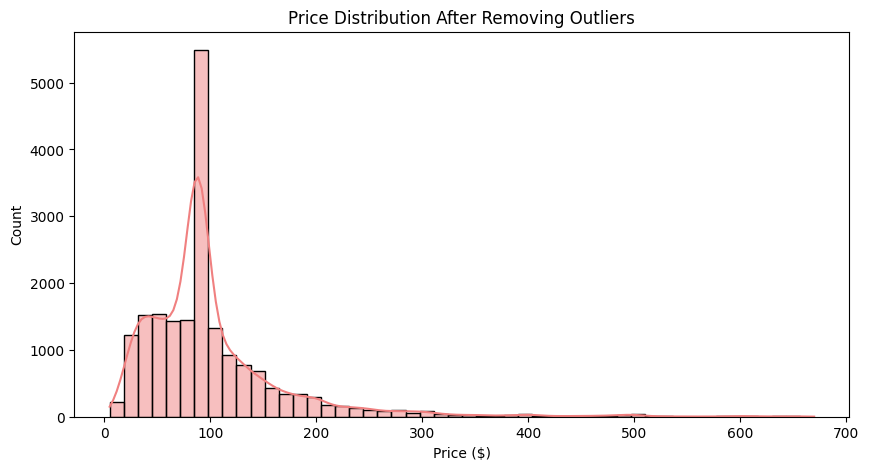

In [18]:
# Define threshold using the 99th percentile
price_threshold = df['price'].quantile(0.99)

# Filter out extreme values
df = df[df['price'] <= price_threshold]

# Recheck distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color="lightcoral")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Price Distribution After Removing Outliers")
plt.show()


-This histogram confirms that most Airbnb listings have a price range below $150, with a sharp peak around $100. The distribution is still right-skewed, but filtering out extreme values has improved readability.

🔍 Key Observations:
- The majority of listings fall between $50 - $150.
- There is a noticeable spike at $100, which could indicate a common pricing strategy.
- Prices gradually decrease beyond $150, with very few listings above $300.

# 🏙️ Price Analysis by Neighborhood
#### Objective
-We will explore how Airbnb prices vary across different neighborhoods to identify high-end and budget-friendly areas.

-**Steps**
1.Group data by neighborhood and calculate the average price.
2.Visualize price variations using a bar plot.
3.Extract insights on which areas are the most expensive and affordable.

C:\Users\use\AppData\Local\Temp\ipykernel_11944\1102092384.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_neighborhood.index[:15], y=avg_price_neighborhood.values[:15], palette="Reds_r")


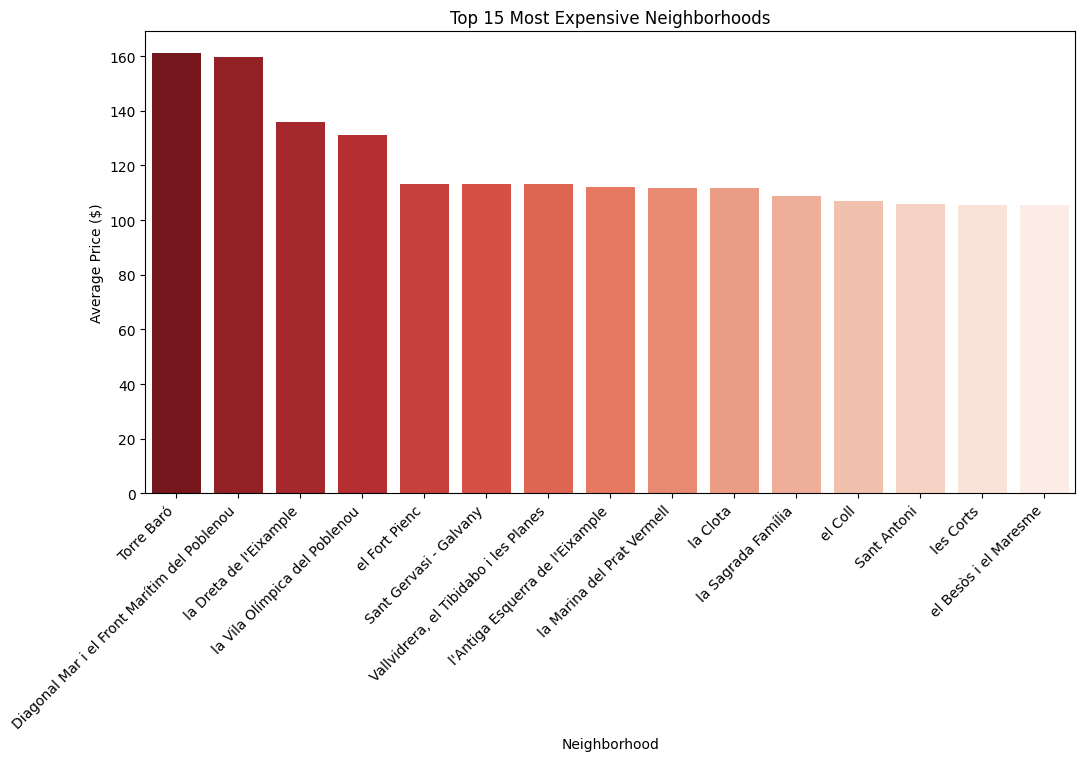

In [19]:
# Grouping by neighborhood and calculating the average price
avg_price_neighborhood = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_neighborhood.index[:15], y=avg_price_neighborhood.values[:15], palette="Reds_r")
plt.xticks(rotation=45,ha="right")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price ($)")
plt.title("Top 15 Most Expensive Neighborhoods")
plt.show()


### 📝 Observations and Insights on Neighborhood Prices  

1. **Luxury Neighborhoods Exist**  
   - Some neighborhoods, such as **Torre Baró** and **Front Marítim del Poblenou**, have the highest **average** prices (~$160 per night).  
   - These may cater to high-end travelers or be located near premium attractions.  

2. **Price Variability Across Neighborhoods**  
   - The **price differences** between the most expensive and the least expensive of the top 15 neighborhoods are significant.  
   - Some areas are **highly priced**, while others remain relatively affordable even within the top-ranking ones.  

3. **Tourist Hotspots vs. Local Areas**  
   - High-priced neighborhoods likely indicate **tourist demand**, proximity to **landmarks**, or a concentration of **luxury rentals**.  
   - More **residential** areas might have lower prices, catering to longer-term stays.  

4. **Potential Business Insights**  
   - Hosts can **adjust pricing strategies** based on location-based demand.  
   - Investors can **identify lucrative areas** for short-term rental properties.  


#### Objective2
-Extract insights on which areas are the cheapest and affordable.

C:\Users\use\AppData\Local\Temp\ipykernel_11944\3572770789.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cheapest_neighborhoods.index, y=cheapest_neighborhoods.values, palette="Blues_r")


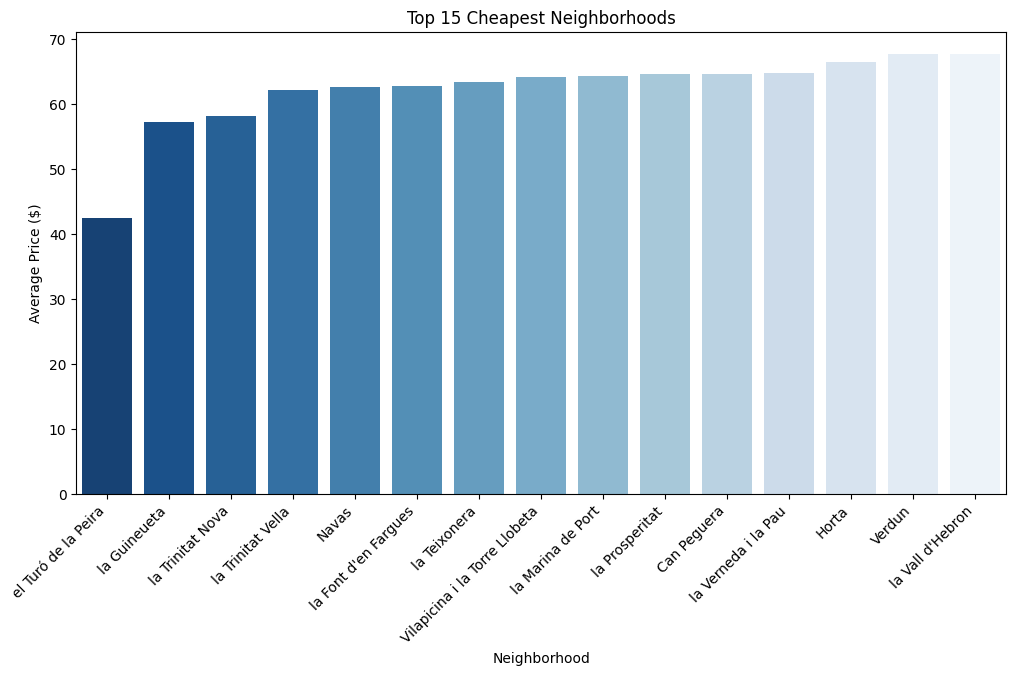

In [20]:
# Get the 15 cheapest neighborhoods
cheapest_neighborhoods = avg_price_neighborhood.nsmallest(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=cheapest_neighborhoods.index, y=cheapest_neighborhoods.values, palette="Blues_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price ($)")
plt.title("Top 15 Cheapest Neighborhoods")
plt.show()


-**Analysis of the Cheapest Neighborhoods**
#### Price Distribution

-The cheapest neighborhoods have average prices between $40 and $70, significantly lower than the most expensive ones.
El Turó de la Peira has the lowest average price, around $42, while La Vall d’Hebron is at the upper end, near $69.
#### Possible Factors for Lower Prices

-These areas may be far from the city center or less connected to major transport hubs.

- They could have fewer tourist attractions, making them less in demand.

- The accommodation types might lean towards budget-friendly options, such as shared apartments or smaller listings.
#### Neighborhood Characteristics

-Some neighborhoods like Horta and Verdun might be residential, offering a quieter stay.
-Others, like La Guineueta and Navas, may be transitioning areas with growing development.


### **Comparison: Cheapest vs. Most Expensive Neighborhoods**

| Factor              | Cheapest Neighborhoods         | Most Expensive Neighborhoods  |
|---------------------|-----------------------------|-----------------------------|
| **Price Range ($)** | 40 - 70                      | 160+                        |
| **Location**        | Likely farther from center   | Closer to city center, key attractions |
| **Demand**         | Likely lower                 | High due to tourism/business |
| **Room Types**     | Budget options, shared spaces | Luxury apartments, entire homes |
| **Target Audience** | Budget travelers, long-term renters | Tourists, business travelers |
| **Investment Potential** | Growing but lower revenue | High revenue, but expensive entry cost |
